# Описание датасета CoVoST2

Для полноценной загрузки данных нужно использовать ресурсы от команды ориг. статьи. https://github.com/facebookresearch/covost
## Общее описание
Датасет CoVoST2 представляет собой параллельный датасет для задачи перевода речи, содержащий аудиофайлы и их текстовые транскрипции на нескольких языках. В данном случае используются пары текстов на английском и немецком языках.

Для работы с датасетом нужно качать большие исходные файлы. Api не поддерживается полностью, а лишь выполняет часть функционала 

## Задачи
Основная задача — обучение моделей перевода речи с соурс языка на таргет язык. Датасет предоставляет текстовую транскрипцию (sentence) и перевод (translation) для каждого аудиофайла.

Дополнительно можно использовать для распознования речи

## Данные
1) **Язык**: Английский → Немецкий (но есть возможность выбрать другие пары)

2) **Количество записей**: 288174

3) **Формат данных**: 
   - `path`: имя файла аудиозаписи.
   - `sentence`: транскрипция речи на английском.
   - `translation`: перевод на немецкий язык.
   - `client_id`: уникальный идентификатор говорящего.

## Анализ данных

### Процент пустых строк и null значений
| Column      | Процент None/пустой строки |
|-------------|----------------------------|
| path        | 0.0                        |
| sentence    | 0.0                        |
| translation | 0.0                        |
| client_id   | 0.0                        |

### Общее количество символов
- **sentence**: 16,835,280
- **translation**: 19,270,451
- **Все колонки**: 36,105,731

### Таблица распределения длины текстов
|               | Средняя | Медианная | Минимальная | Максимальная |
|---------------|---------|-----------|-------------|--------------|
| Sentence      | 58.42   | 59.0      | 3           | 210          |
| Translation   | 66.87   | 66.0      | 3           | 362          |

In [27]:
import pandas as pd
import re
from collections import Counter
from mutagen.mp3 import MP3
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords
from nltk.util import ngrams
from wordcloud import WordCloud
import nltk
from tqdm import tqdm

from IPython.display import Audio, display
import os
import random

In [3]:
import sys

# Добавляем путь к директории, в которой находится файл example.py
sys.path.append(r"F:\python\year_project\SpeechGPT\datasets\examples")

In [4]:
# Импортируем CoVoST2Dataset из example.py
from covost import CoVoST2Dataset

In [5]:
# Определяем пути к файлам для train, dev и test
file_paths = {
    'train': r"F:\python\year_project\SpeechGPT\datasets\examples\covost_v2.en_de.train.tsv",
    'dev': r"F:\python\year_project\SpeechGPT\datasets\examples\covost_v2.en_de.dev.tsv",
    'test': r"F:\python\year_project\SpeechGPT\datasets\examples\covost_v2.en_de.test.tsv"
}

# Создаем экземпляр CoVoST2Dataset
dataset = CoVoST2Dataset(file_paths)

In [6]:
# Выбираем тип датасета и используем итератор
dataset_type = 'train'  # Измените на 'dev' или 'test' при необходимости

for item in dataset.load_data(dataset_type, n_rows=5):
    print(item)

CovostItem(id=0, path='common_voice_en_18861476.mp3', sentence='This newspaper page is no longer dedicated to Hanson exclusively.', translation='Diese Zeitungsseite ist nicht mehr ausschließlich Hanson gewidmet.', client_id='5a9f0fd439cd8faf920c0c4578de2582743e4b29fc20b57f60cf857a9ba6ccc38b161827535ff9783b1da93b8c1a0622f60e6df17323a184f379b68c5f6244ed')
CovostItem(id=1, path='common_voice_en_18855041.mp3', sentence='Beneath the stand lies the changing rooms and offices.', translation='Unter der Tribüne befinden sich die Umkleiden und Büros.', client_id='6556be264d88409909ca88eaa507f75be6aad0dbf5240c9fb6848839d41ba0f92a84c184dcc891b2efbcc2689098117efbb9ec147c7fe4398a73d499703ab22b')
CovostItem(id=2, path='common_voice_en_18855042.mp3', sentence='Fossils of both "Diselma" and "Fitzroya" have been recorded in Tasmania.', translation='In Tasmanien sind sowohl Fossilien von „Diselma“ als auch „Fitzroya“ dokumentiert.', client_id='6556be264d88409909ca88eaa507f75be6aad0dbf5240c9fb6848839d41ba

In [7]:
# Загружаем данные
dataset_type = 'train'  # есть варианты dev и test
records = list(dataset.load_data(dataset_type))

In [8]:
# Подсчет количества записей
num_records = len(records)
print(f"Количество записей в датасете: {num_records}")

Количество записей в датасете: 288174


In [9]:
# Создаем DataFrame
df = pd.DataFrame([{
    'path': item.path,
    'sentence': item.sentence,
    'translation': item.translation,
    'client_id': item.client_id
} for item in records])

In [10]:
def play_audio_samples(dataset, audio_folder, num_files=5, randomize=False):
    """
    Воспроизводит заданное количество аудиофайлов из датасета.

    :param dataset: Объект датасета для загрузки данных.
    :param audio_folder: Путь к папке с аудиофайлами.
    :param num_files: Количество аудиофайлов для воспроизведения.
    :param randomize: Если True, выбирает случайные аудиофайлы, иначе берет первые.
    """
    # Извлекаем записи из датасета
    records = list(dataset.load_data('train'))

    # Выбираем случайные или первые записи
    if randomize:
        selected_records = random.sample(records, num_files)
    else:
        selected_records = records[:num_files]
    
    # Проигрываем аудиофайлы
    for record in selected_records:
        audio_path = os.path.join(audio_folder, record.path)
        print(f"Проигрывание файла: {audio_path}")
        display(Audio(filename=audio_path, autoplay=False))


audio_folder = r"F:\python\jahr_arbeit\cv-corpus-19.0-2024-09-13\en\clips"
play_audio_samples(dataset, audio_folder, num_files=5, randomize=True)

Проигрывание файла: F:\python\jahr_arbeit\cv-corpus-19.0-2024-09-13\en\clips\common_voice_en_18646018.mp3


Проигрывание файла: F:\python\jahr_arbeit\cv-corpus-19.0-2024-09-13\en\clips\common_voice_en_594268.mp3


Проигрывание файла: F:\python\jahr_arbeit\cv-corpus-19.0-2024-09-13\en\clips\common_voice_en_18974761.mp3


Проигрывание файла: F:\python\jahr_arbeit\cv-corpus-19.0-2024-09-13\en\clips\common_voice_en_18639893.mp3


Проигрывание файла: F:\python\jahr_arbeit\cv-corpus-19.0-2024-09-13\en\clips\common_voice_en_19981604.mp3


In [23]:
def get_audio_length_mutagen(audio_path):
    audio = MP3(audio_path)
    return audio.info.length  # Длительность в секундах

In [28]:
# Путь к папке с аудиофайлами
audio_folder = r"F:\python\jahr_arbeit\cv-corpus-19.0-2024-09-13\en\clips"

tqdm.pandas()

# Добавляем новый столбец 'audio_length' с длительностью каждого аудиофайла
df['audio_length'] = df['path'].progress_apply(lambda x: get_audio_length_mutagen(os.path.join(audio_folder, x)))

100%|█████████████████████████████████████████████████████████████████████████| 288174/288174 [24:12<00:00, 198.44it/s]


In [29]:
# Рассчитываем статистики
average_length = df['audio_length'].mean()
median_length = df['audio_length'].median()
max_length = df['audio_length'].max()

print(f"Средняя длина: {average_length:.2f} секунд")
print(f"Медианная длина: {median_length:.2f} секунд")
print(f"Максимальная длина: {max_length:.2f} секунд")

Средняя длина: 5.34 секунд
Медианная длина: 5.21 секунд
Максимальная длина: 24.67 секунд


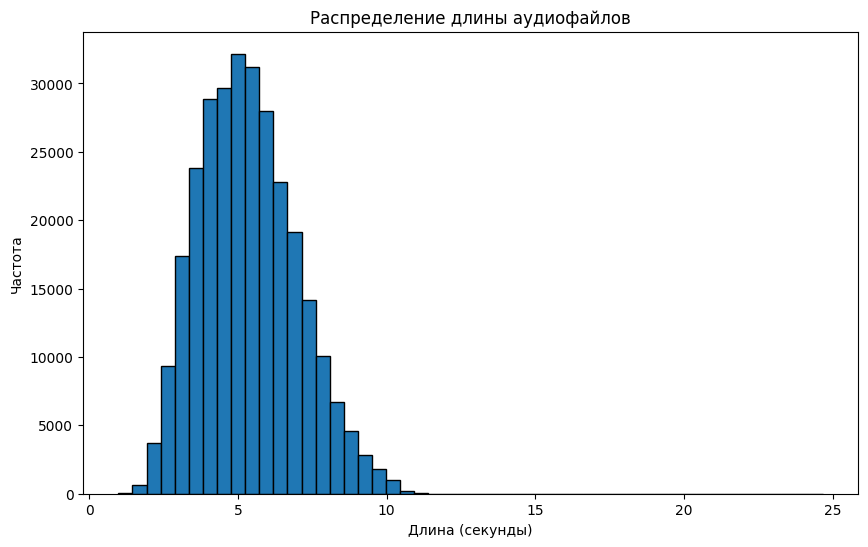

In [30]:
# Построение гистограммы распределения длительностей
plt.figure(figsize=(10, 6))
plt.hist(df['audio_length'], bins=50, edgecolor='black')
plt.title("Распределение длины аудиофайлов")
plt.xlabel("Длина (секунды)")
plt.ylabel("Частота")
plt.show()

In [31]:
# 1. Проверка на пустые строки и None
def calculate_null_percentage(df):
    null_percentage = {}
    for column in df.columns:
        null_count = df[column].isnull().sum() + (df[column] == '').sum() + (df[column] == ' ').sum()
        total_count = len(df[column])
        null_percentage[column] = (null_count / total_count) * 100 if total_count > 0 else 0
    return null_percentage

null_percentage = calculate_null_percentage(df)
null_percentage_df = pd.DataFrame(null_percentage.items(), columns=['Column', 'Процент None/пустой строки'])
print("Процент пустых строк и null значений в каждой колонке:")
print(null_percentage_df)

Процент пустых строк и null значений в каждой колонке:
         Column  Процент None/пустой строки
0          path                         0.0
1      sentence                         0.0
2   translation                         0.0
3     client_id                         0.0
4  audio_length                         0.0


In [32]:
# 2. Подсчет общего количества символов
total_characters = {
    "sentence": df['sentence'].str.len().sum(),
    "translation": df['translation'].str.len().sum(),
}
total_characters_all = sum(total_characters.values())

print("Общее количество символов:")
for column, total in total_characters.items():
    print(f"{column}: {total:,.0f}")
print(f"Все колонки: {total_characters_all:,.0f}")

Общее количество символов:
sentence: 16,835,280
translation: 19,270,451
Все колонки: 36,105,731


In [33]:
# 3. Проверка длины текстов
df['sentence_length'] = df['sentence'].apply(len)
df['translation_length'] = df['translation'].apply(len)

# Статистика по длине текстов
stats_df = pd.DataFrame({
    'Средняя': [df['sentence_length'].mean(), df['translation_length'].mean()],
    'Медианная': [df['sentence_length'].median(), df['translation_length'].median()],
    'Минимальная': [df['sentence_length'].min(), df['translation_length'].min()],
    'Максимальная': [df['sentence_length'].max(), df['translation_length'].max()]
}, index=['Sentence', 'Translation'])

print("Таблица распределения длины текстов:")
print(stats_df)

Таблица распределения длины текстов:
               Средняя  Медианная  Минимальная  Максимальная
Sentence     58.420538       59.0            3           210
Translation  66.870887       66.0            3           362


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\IvanYa\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


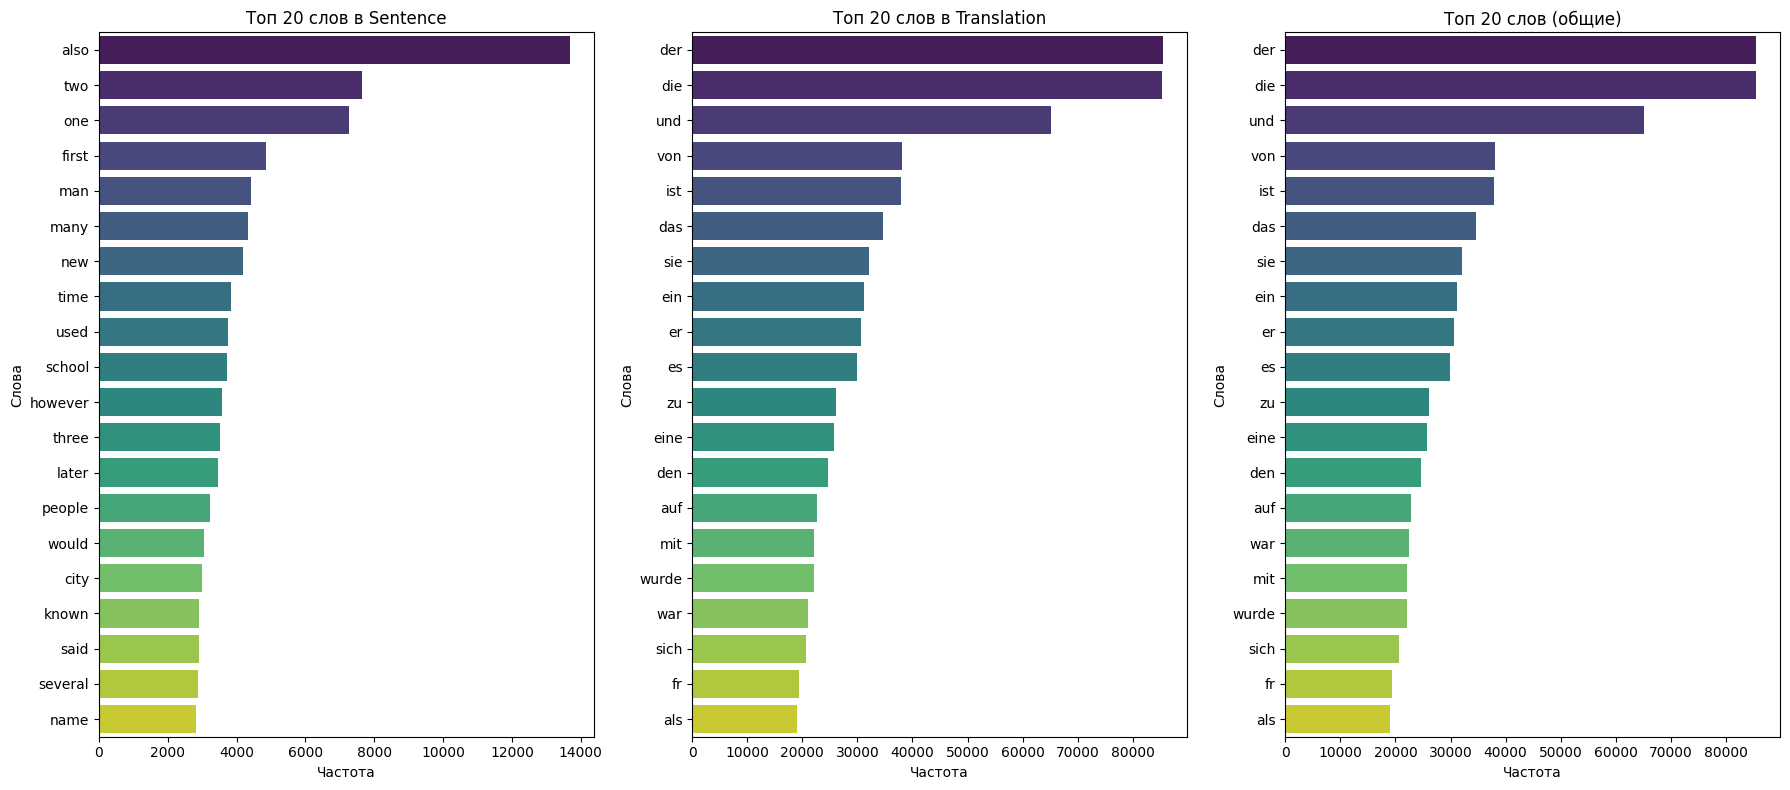

In [34]:
# 4. Частотный анализ слов
N = 20  # число самых популярных слов для подсчета

# Скачиваем стоп слова из nltk
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    if pd.isnull(text):
        return []
    # Оставляем только буквы
    text = re.sub(r'[^a-zA-Z\s]', '', text).lower()
    words = text.split()
    # Исключаем стоп-слова
    return [word for word in words if word not in stop_words]

# Препроцесс текста и подсчет частот
sentence_words = df['sentence'].apply(preprocess_text).explode()
translation_words = df['translation'].apply(preprocess_text).explode()

sentence_word_counts = Counter(sentence_words)
translation_word_counts = Counter(translation_words)
all_word_counts = sentence_word_counts + translation_word_counts

# Получение N самых частых слов
sentence_most_common = sentence_word_counts.most_common(N)
translation_most_common = translation_word_counts.most_common(N)
all_most_common = all_word_counts.most_common(N)

# Функция для отрисовки графиков
def plot_top_words(word_counts, title, ax):
    words, counts = zip(*word_counts)
    sns.barplot(x=list(counts), y=list(words), ax=ax, palette='viridis', hue=list(words), dodge=False)
    ax.set_title(title)
    ax.set_xlabel('Частота')
    ax.set_ylabel('Слова')

# Построение графиков
fig, axs = plt.subplots(1, 3, figsize=(18, 8))
plot_top_words(sentence_most_common, f'Топ {N} слов в Sentence', axs[0])
plot_top_words(translation_most_common, f'Топ {N} слов в Translation', axs[1])
plot_top_words(all_most_common, f'Топ {N} слов (общие)', axs[2])

plt.tight_layout()
plt.show()

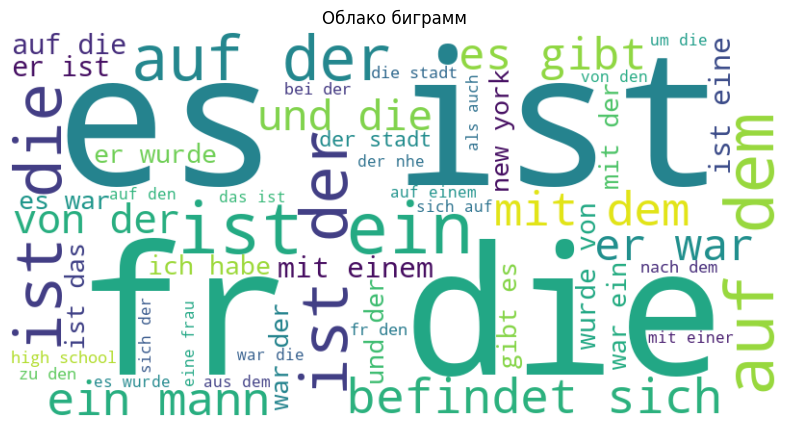

In [35]:
# Функция для препроцессинга текста
def preprocess_text(text):
    if pd.isnull(text):
        return []
    text = re.sub(r'[^a-zA-Z\s]', '', text).lower()
    words = text.split()
    return [word for word in words if word not in stop_words]

# Объединяем слова из sentence и translation для анализа биграмм
all_words = pd.concat([df['sentence'].apply(preprocess_text), df['translation'].apply(preprocess_text)]).explode()

# 5. Частотный анализ биграмм
M = 50

# Функция для извлечения N-грамм
def extract_ngrams(words, n):
    return list(ngrams(words, n))

# Извлечение биграмм и подсчет их частоты
bigrams = extract_ngrams(all_words, 2)
bigram_counts = Counter(bigrams)

# Преобразуем биграммы в строки
top_bigrams = bigram_counts.most_common(M)
top_bigrams_str = {f"{bigram[0]} {bigram[1]}": count for bigram, count in top_bigrams}

# Визуализация биграмм с помощью облака слов
bigram_cloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(top_bigrams_str)
plt.figure(figsize=(10, 5))
plt.imshow(bigram_cloud, interpolation='bilinear')
plt.axis('off')
plt.title('Облако биграмм')
plt.show()